### Contexto

---

Rede Neural do tipo Perceptron de Multíplas Camadas com 3 entradas $x_1$, $x_2$ e $x_3$ e 10 neurônios em uma camada intermediária e um único neurônio na camada de saída para $y$

<img src="EPC4_Rede_Adaline.jpg" width="600">


### Bibliotecas utilizadas

---

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Tratamento dos dados

---

In [24]:
# Leitura dos dados

data = pd.read_csv('data_58_RNA.txt', delim_whitespace=True)

In [350]:
data

,x1,x2,x3,d
0,0.8799,0.7998,0.3972,0.8399
1,0.5700,0.5111,0.2418,0.6258
2,0.6796,0.4117,0.3370,0.6622
3,0.3567,0.2967,0.6037,0.5969
4,0.3866,0.8390,0.0232,0.5316
...,...,...,...,...
195,0.0339,0.4669,0.1526,0.3250
196,0.0080,0.8988,0.4201,0.5404
197,0.9955,0.8897,0.6175,0.9360
198,0.7408,0.5351,0.2732,0.6949


In [65]:
# Separacao dos dados

x1 = data['x1'].copy()
x2 = data['x2'].copy()
x3 = data['x3'].copy()
X = pd.concat([x1, x2, x3], axis=1)

d = data['d'].copy()

In [66]:
# Verifica a normalizacao

min = X.values.min()
max = X.values.max()

print(f'min = {min} \n max = {max}')

min = 0.0 
 max = 1.0


Já normalizado

In [189]:
X = np.array(X)

d = np.array(d)
d = d.reshape(-1, 1)

### Treinamento da rede neural MLP

---

In [415]:
# valor maximo de epocas
MAX_EPOCA = int(10e+6)

# Taxa de aprendizado
n = 0.1

# Precisao
p = 10e-6

Funcao logistica (sigmoide):

$f(u) = 1 / (1 + e^{(-β*u)})$

sendo $β$ o fator de inclinacao da funcao e $u$ a entrada

In [417]:
def func_ativacao(u, beta):

    g = 1 / (1 + np.exp(-beta * u))

    return g

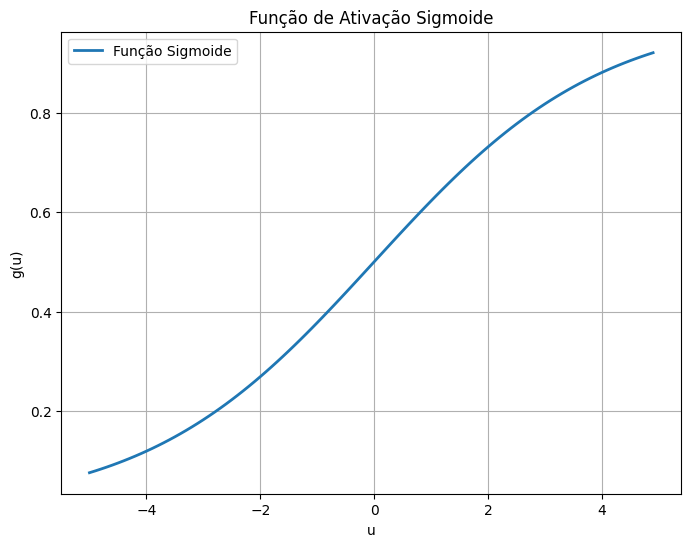

In [428]:
u = np.arange(-5,5,0.1)
resultado = func_ativacao(u, 0.5)

plt.figure(figsize=(8, 6))
plt.plot(u, resultado, label='Função Sigmoide', linewidth=2)
plt.xlabel('u')
plt.ylabel('g(u)')
plt.title('Função de Ativação Sigmoide')
plt.grid(True)
plt.legend()
plt.show()

In [419]:
def func_ativacao_derivada(u, beta):
    
    gd = (beta * np.exp(-beta * u))/((np.exp(-beta * u) + 1) ** 2)

    return gd

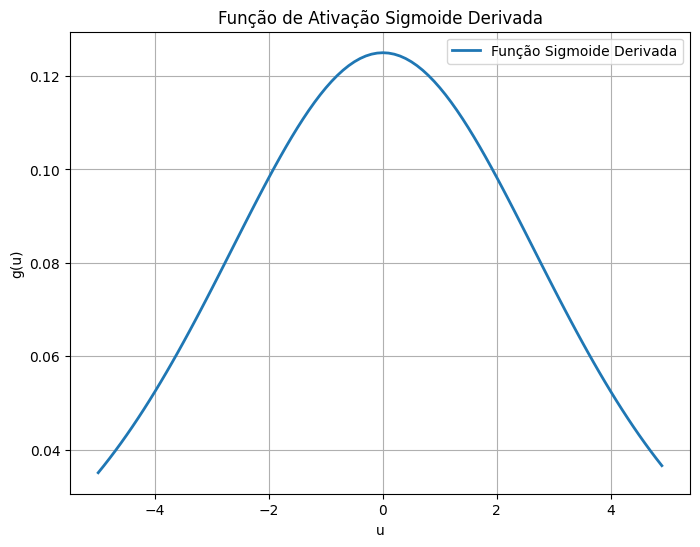

In [429]:
u = np.arange(-5,5,0.1)
resultado = func_ativacao_derivada(u, 0.5)

plt.figure(figsize=(8, 6))
plt.plot(u, resultado, label='Função Sigmoide Derivada', linewidth=2)
plt.xlabel('u')
plt.ylabel('g(u)')
plt.title('Função de Ativação Sigmoide Derivada')
plt.grid(True)
plt.legend()
plt.show()

In [424]:
# X -> dados de entrada
# d -> saida desejada (alvo)
# W_1 -> pesos sinapticos iniciais da camada 1
# W_2 -> pesos sinapticos iniciais da camada 2
# n -> taxa de aprendizado
# MAX_EPOCA -> MAX_EPOCA
# p -> precisao
# beta -> inclinacao das funcoes

def treinamento(X, d, n, MAX_EPOCA, p, beta):

    for n_treino in range(5):

        print('-'*30)
        print(f'Treinamento numero: {n_treino + 1}')
        print('-'*30)
        
        # Contador de epocas
        epoca = 0

        # Vetor de erros
        erro = np.zeros(MAX_EPOCA)

        while(epoca < MAX_EPOCA):

            # print(f'epoca {epoca}')

            #######################
            # ETAPAS FEED FORWARD #
            #######################
            
            # entradas I_1 e saida Y_1 da camada 1

            # Pesos aleatorios entre 0 e 1 do n_treino
            # (10, 3) -> (10 neuronios, 3 entradas)
            W_1 = np.random.rand(10,3)

            # Salva na tabela Wi_1
            if epoca == 0:
                Wi_1 = pd.DataFrame(W_1, columns=['w0', 'w1', 'w2'])

            # Entrada I_1 = X * W_1
            I_1 = X.dot(W_1.T)

            # Saida Y_1 = g(I_1)
            Y_1 = func_ativacao(I_1, beta)
            
            # entrada I_2 e saida Y_2 da camada 2 de saída

            # Pesos aleatorios entre 0 e 1 do n_treino
            # (1, 10) -> (1 neuronios, 10 entradas)
            W_2 = np.random.rand(1, 10)

            # Salva na tabela W_2
            if epoca == 0:
                Wi_2 = pd.DataFrame(W_2, columns=['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9'])

            # Entrada I_2 = I_1 * W_2 (do treino em questao)
            I_2 = (I_1).dot(W_2.T)

            # Saida Y_2 = g(I_2)
            Y_2 = func_ativacao(I_2, beta)

            # Erro da previsao FOWARD
            erro[epoca] = np.mean((d - Y_2) ** 2)
            
            ######################
            # ETAPAS DE BACKWARD #
            ######################

            # gradiente local em relacao ao j-esimo neuronio da camada 2 de saida (delta_2)

            gd_2 = func_ativacao_derivada(I_2, beta)

            erro_2 = d - Y_2

            delta_2 = erro_2*gd_2

            # ajuste de W_2

            corr_2 = ((n * delta_2).T).dot(Y_1)

            W_2_bp = W_2 + corr_2

            # Salva na tabela W_2
            Wf_2 = pd.DataFrame(W_2_bp, columns=['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9'])

            # gradiente local em relacao ao j-esimo neuronio da camada 1 (delta_1)

            gd_1 = func_ativacao_derivada(I_1, beta)

            delta_1 = (delta_2.dot(W_2_bp)) * gd_1

            # ajuste de W_1
            
            corr_1 = ((n * delta_1).T).dot(X)

            W_1_bp = W_1 + corr_1
            
            # print('-'*30)
            # print(f'Pesos ajustados - camada 1: \n {W_1_bp}')
            # print('-'*30)


            # Salva na tabela W_2
            Wf_1 = pd.DataFrame(W_1_bp, columns=['w0', 'w1', 'w2'])

            # Calculo da saida ajustada Y_2_bp

            I_1_bp = X.dot(W_1_bp.T)

            Y_1_bp = func_ativacao(I_1_bp, beta)

            I_2_bp = (I_1_bp).dot(W_2_bp.T)

            Y_2_bp = func_ativacao(I_2_bp, beta)

            # Erro da previsao PÓS-BACKWARD
            erro[epoca + 1] = np.mean((d - Y_2_bp) ** 2)

            # Incremente de epoca
            epoca = epoca + 1

            # Busca pela precisao
            if np.all(abs(erro[epoca] - erro[epoca - 1]) < p):

                print(f'Convergência em {epoca} épocas')
                print(f'Erro Médio Quadrático = {erro[epoca]}')

                
                
                # Grafico do erro
                plt.figure()
                plt.plot(np.arange(epoca+1), erro[:epoca+1], linewidth=1)
                ttl = f'Erro pelas épocas (Treinamento {n_treino + 1})'
                plt.title(ttl)
                plt.ylabel('Erro Quadrático Médio')
                plt.xlabel('Épocas')
                plt.xlim(0, epoca)
                plt.ylim(0, 1)
                plt.grid()
                plt.savefig(f'EPC5_n_treino{n_treino + 1}.pdf', format='pdf')
                plt.show()

                break
            
    return

In [ ]:
print('-'*30)
print(f'Pesos iniciais aleatorios - camada 1:')
print(Wi_1)
print(f'Pesos iniciais aleatorios - camada 2:')
print(Wi_2)
print(f'Pesos ajustados - camada 1:')
print(Wf_1)
print(f'Pesos ajustados - camada 2:')
print(Wf_2)

------------------------------
Treinamento numero: 1
------------------------------
Convergência em 30655 épocas
Erro Médio Quadrático = 0.01992023496299413


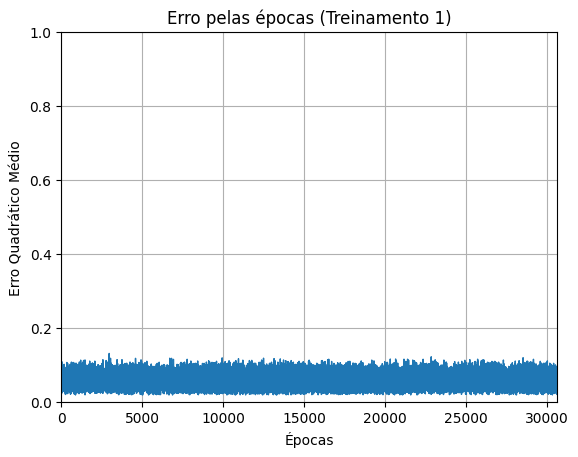

------------------------------
Treinamento numero: 2
------------------------------
Convergência em 13005 épocas
Erro Médio Quadrático = 0.02109905190348786


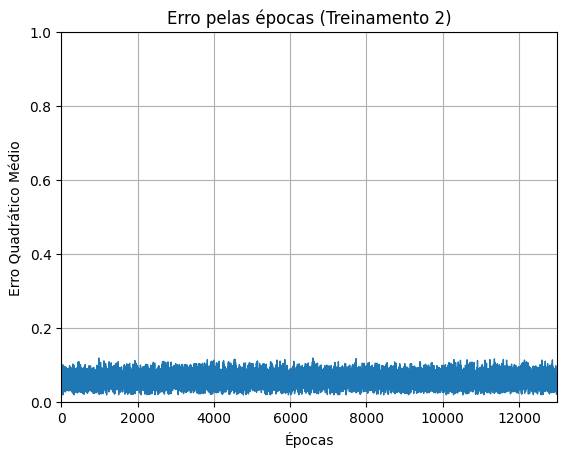

------------------------------
Treinamento numero: 3
------------------------------
Convergência em 49735 épocas
Erro Médio Quadrático = 0.019557002709174705


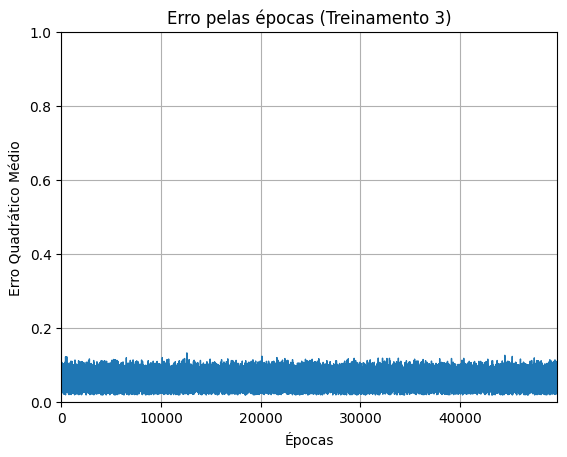

------------------------------
Treinamento numero: 4
------------------------------
Convergência em 94678 épocas
Erro Médio Quadrático = 0.01935978631301087


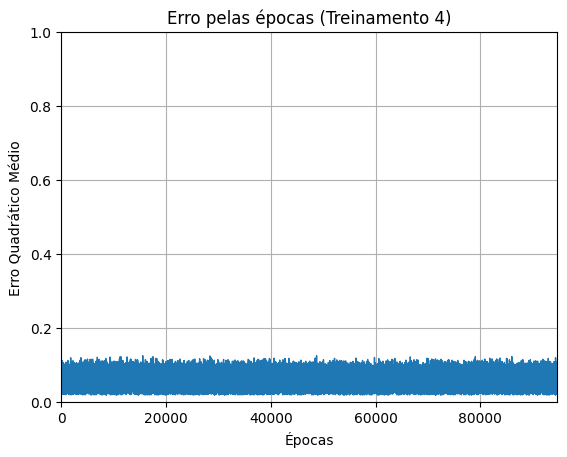

------------------------------
Treinamento numero: 5
------------------------------
Convergência em 8113 épocas
Erro Médio Quadrático = 0.019671786728851132


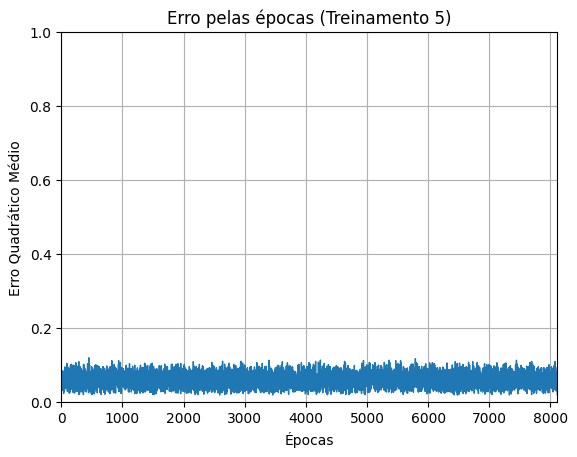

In [427]:
treinamento(X, d, n, MAX_EPOCA, p, 0.5)

### Teste da rede neural

---

In [31]:
data_teste = pd.read_csv('data_teste_46_RNA.txt', delim_whitespace=True)


In [32]:
data_teste

,x1,x2,x3,x4
0,0.9694,0.6909,0.4334,3.4965
1,0.5427,1.3832,0.6390,4.0352
2,0.6081,-0.9196,0.5925,0.1016
3,-0.1618,0.4694,0.2030,3.0117
4,0.1870,-0.2578,0.6124,1.7749
5,0.4891,-0.5276,0.4378,0.6439
6,0.3777,2.0149,0.7423,3.3932
7,1.1498,-0.4067,0.2469,1.5866
8,0.9325,1.0950,1.0359,3.3591
9,0.5060,1.3317,0.9222,3.7174


In [33]:
X_teste_norm = normalizacao(data_teste)

In [34]:
X_teste_norm['bias'] = -1

In [35]:
X_teste_norm = np.array(X_teste_norm)

In [36]:
X_teste_norm

array([[ 0.18108795,  0.12906299,  0.08096092,  0.65316073, -1.        ],
       [ 0.10137861,  0.25838751,  0.11936785,  0.75379212, -1.        ],
       [ 0.11359561, -0.1717851 ,  0.11068146,  0.0189793 , -1.        ],
       [-0.03022491,  0.08768587,  0.03792124,  0.56259807, -1.        ],
       [ 0.03493238, -0.04815811,  0.11439886,  0.33155869, -1.        ],
       [ 0.09136591, -0.09855787,  0.08178286,  0.1202832 , -1.        ],
       [ 0.07055593,  0.37639169,  0.13866472,  0.63386386, -1.        ],
       [ 0.21478742, -0.07597325,  0.04612195,  0.29638347, -1.        ],
       [ 0.17419487,  0.20455055,  0.19351042,  0.62749384, -1.        ],
       [ 0.0945229 ,  0.24876709,  0.17227079,  0.69442576, -1.        ],
       [ 0.00928417, -0.38586266,  0.11439886, -0.12301054, -1.        ],
       [ 0.07479638,  0.66070761,  0.18243294,  1.        , -1.        ],
       [-0.0350071 ,  0.24925278,  0.10038855,  0.60130389, -1.        ],
       [ 0.0945229 ,  0.24876709,  0.1

In [37]:
def teste(X, wf):

    wf_T = wf.transpose()
    wf_T = np.array(wf_T)

    u_teste = X.dot(wf_T)

    for j in range(5):

        print('-'*30)
        print(f'Teste numero: {j}')
        print('-'*30)

        y_teste = func_ativacao(u_teste[:,j])

        print(y_teste)

    return u_teste

### Aplicacação da rede neural

---

In [38]:
def app(MAX_EPOCA, n, p, wi, wf, X_norm, y, X_teste_norm):

    pesos_inicias, pesos_finais = treinamento(MAX_EPOCA, n, p, wi, wf, X_norm, y)

    resultado = teste(X_teste_norm, pesos_finais)

    return pesos_inicias, pesos_finais, resultado

------------------------------
Treinamento numero: 0
------------------------------
Pesos iniciais aleatorios: 
 [[0.84514022]
 [0.43907428]
 [0.29719178]
 [0.55122037]
 [0.9674655 ]]
------------------------------
Convergência em 656 épocas
Pesos finais: 
 [[ 0.52264687]
 [ 0.48831271]
 [-0.03446504]
 [-0.35463238]
 [-0.0775345 ]]


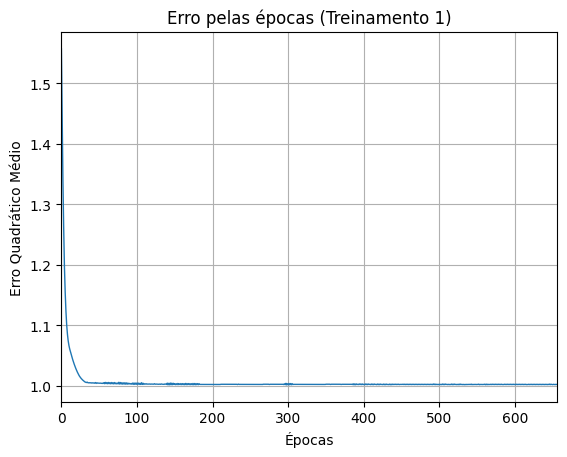

------------------------------
Treinamento numero: 1
------------------------------
Pesos iniciais aleatorios: 
 [[0.93748445]
 [0.33033282]
 [0.51042399]
 [0.5648639 ]
 [0.8910466 ]]
------------------------------
Convergência em 713 épocas
Pesos finais: 
 [[ 0.55389949]
 [ 0.50736974]
 [-0.02799277]
 [-0.37291252]
 [-0.0789534 ]]


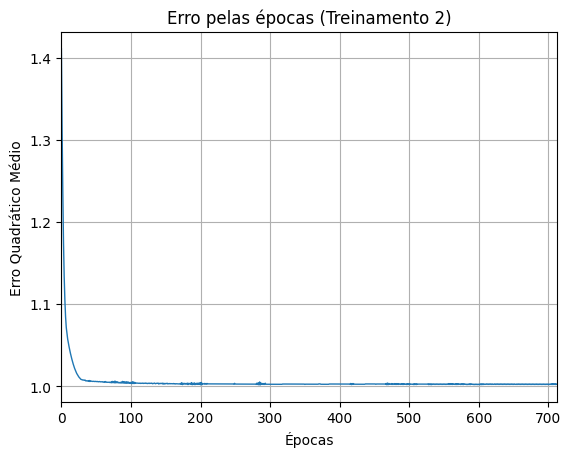

------------------------------
Treinamento numero: 2
------------------------------
Pesos iniciais aleatorios: 
 [[0.37673481]
 [0.78070487]
 [0.85334294]
 [0.47005666]
 [0.24894812]]
------------------------------
Convergência em 840 épocas
Pesos finais: 
 [[ 0.54207833]
 [ 0.51155427]
 [-0.0330187 ]
 [-0.3717651 ]
 [-0.08105188]]
------------------------------
Treinamento numero: 3
------------------------------
Pesos iniciais aleatorios: 
 [[0.83363856]
 [0.5949735 ]
 [0.05689374]
 [0.60143975]
 [0.63519491]]
------------------------------
Convergência em 317 épocas
Pesos finais: 
 [[ 0.54600174]
 [ 0.49224773]
 [ 0.00745595]
 [-0.35271428]
 [-0.07480509]]
------------------------------
Treinamento numero: 4
------------------------------
Pesos iniciais aleatorios: 
 [[0.60707165]
 [0.48089943]
 [0.90889058]
 [0.91251244]
 [0.14343133]]
------------------------------
Convergência em 819 épocas
Pesos finais: 
 [[ 0.46772083]
 [ 0.44595318]
 [-0.03762148]
 [-0.32293995]
 [-0.07156867]

In [134]:
pesos_inicias, pesos_finais, resultado = app(MAX_EPOCA, n, p, wi, wf, X_norm, y, X_teste_norm)

### Resultados

---

In [135]:
pesos_inicias

,w0,w1,w2,w3,w4
0,0.84514,0.439074,0.297192,0.55122,0.967466
1,0.937484,0.330333,0.510424,0.564864,0.891047
2,0.376735,0.780705,0.853343,0.470057,0.248948
3,0.833639,0.594973,0.056894,0.60144,0.635195
4,0.607072,0.480899,0.908891,0.912512,0.143431


In [136]:
pesos_finais

,w0,w1,w2,w3,w4
0,0.522647,0.488313,-0.034465,-0.354632,-0.077534
1,0.553899,0.50737,-0.027993,-0.372913,-0.078953
2,0.542078,0.511554,-0.033019,-0.371765,-0.081052
3,0.546002,0.492248,0.007456,-0.352714,-0.074805
4,0.467721,0.445953,-0.037621,-0.32294,-0.071569
